Name: Md Tamim Ikbal

ID: 23066608

Problem1: In this problem, you will create an artificial data set using one of the NumPy random functions and present the data in a single-panel figure. You are free to decide how to implement this task, provided you meet the basic requirements below. Insightful high quality plots will receive higher marks. 

The basic requirements include:
1. Draw at least 300 points from a random number generator (your choice)
2. Create a histogram of this data
3. Add annotation to indicate the mean and median of the distribution.

Solution: Created 777 points using normal distribution, measured mean and median, then ploted histogram where mean and median visible

In [3]:
# Import numpy and matplotlib.pyplot for calculating and ploting 
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Create random seed for reproducibility
np.random.seed(42) 
#Now generate 777 random points using a normal distribution and assigned it to variable name data
data = np.random.normal(loc=0, scale=1, size=777)

In [7]:
# measuring mean and median using np.mean and np.median 
mean_val = np.mean(data)
median_val = np.median(data)

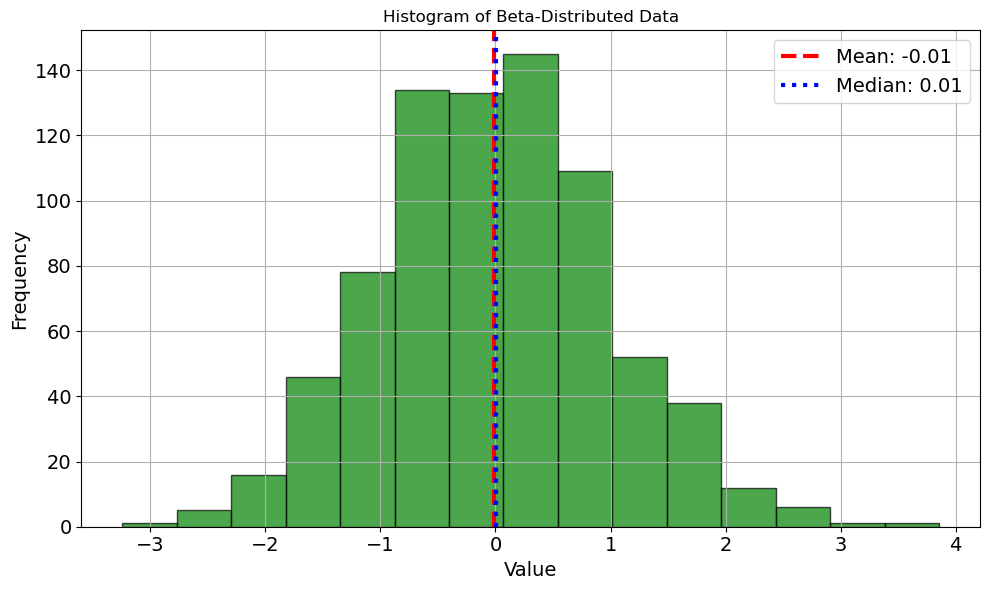

In [9]:
#Creating a function name plot_histogram and passing a agrument named data
def plot_histogram(data):
# Ploting the histogram
    plt.figure(figsize=(10, 6))
    plt.hist(data, bins=15, color='green', edgecolor='black', alpha=0.7)
#Add the anotation for mean median and plot 
    plt.axvline(mean_val, color='red', linestyle='dashed', linewidth=3, label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='blue', linestyle='dotted', linewidth=3, label=f'Median: {median_val:.2f}')
    plt.title('Histogram of Beta-Distributed Data')
# Customizing plot style for the plot
    plt.xlabel("Value", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.grid(True)
# Showing the plot and using tight layout to adjust spaces without overlapping
    plt.tight_layout()
    plt.show()
#calling the function to show the plot 
plot_histogram(data)

Problem 2:Load data from the following parquet file (URL below) into Python. Make elegant plots presenting the data as thoroughly as possible. 
URL:https://star.herts.ac.uk/~kuhn/DHV/exercises_problem2.parquet

Solution: Load the dataset from the folowing url and ploted indevidual histogram of every feature ,Compare every variable with class using scatter plot,Ploted boxplot ,measure the correlation using heatmap and finally created line plot.

In [12]:
# Some more import necessary libraries
import pandas as pd
import seaborn as sns

# Load the parquet file
file_path = 'exercises_problem2.parquet'
data = pd.read_parquet(file_path)

# Preview the data to understand its contents
data.head()

,var1,var2,var3,class
0,2.220386,3.088938,5.309324,1
1,-1.112359,1.838144,0.725785,0
2,-0.687695,1.747231,1.059535,0
3,-2.875016,1.718303,-1.156714,0
4,-2.010930,1.327895,-0.683035,0


In [13]:
# Display to observe summary statistics for numeric columns
data.describe()
# Display to see information about column data types and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    400 non-null    float64
 1   var2    400 non-null    float64
 2   var3    400 non-null    float64
 3   class   400 non-null    int16  
dtypes: float64(3), int16(1)
memory usage: 10.3 KB


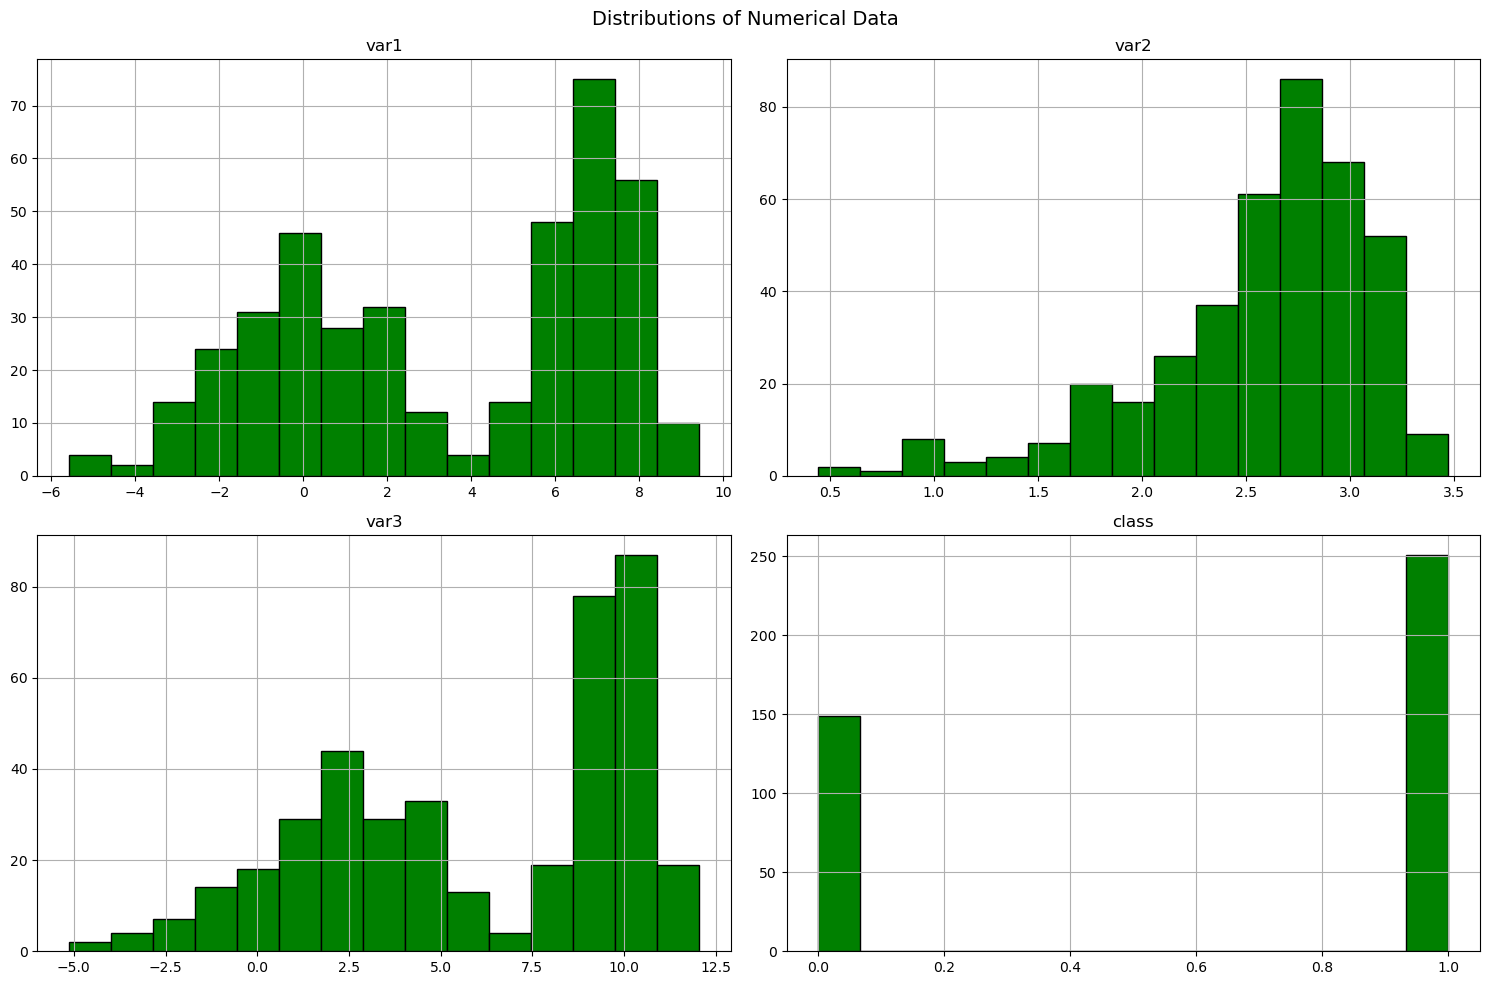

In [22]:
# Plotting histogram Using all of the columns Var1, Var2 ,Var3 and Class 
def Plot_histogram(data):
    data.hist(bins=15, figsize=(15, 10), color='green', edgecolor='black')
    plt.suptitle('Distributions of Numerical Data', fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
Plot_histogram(data)

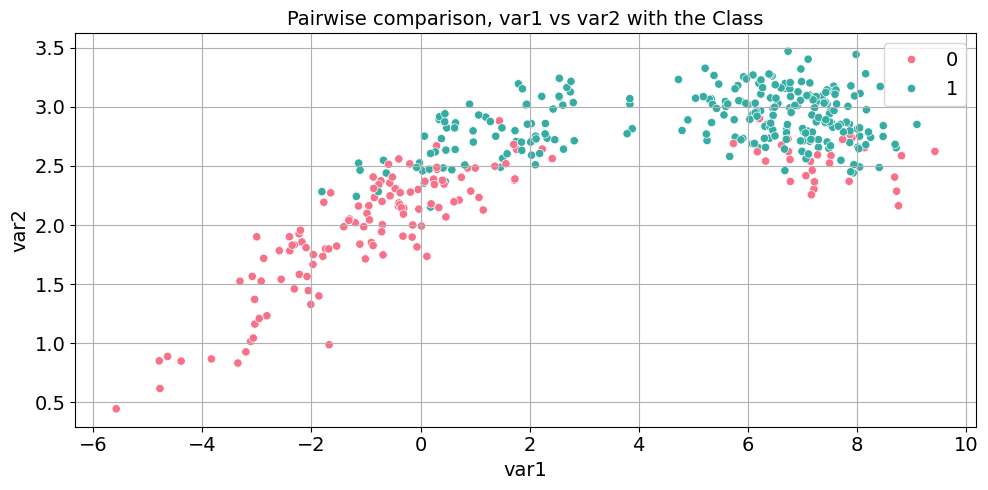

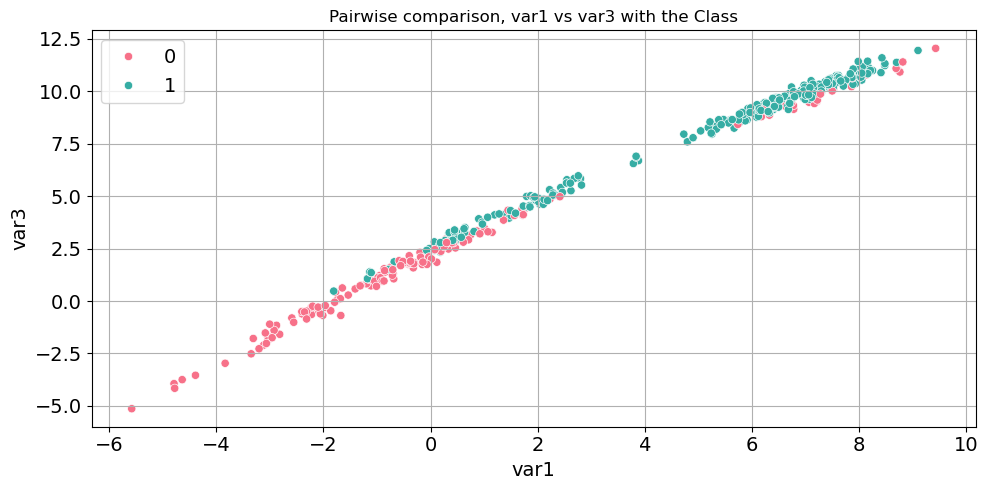

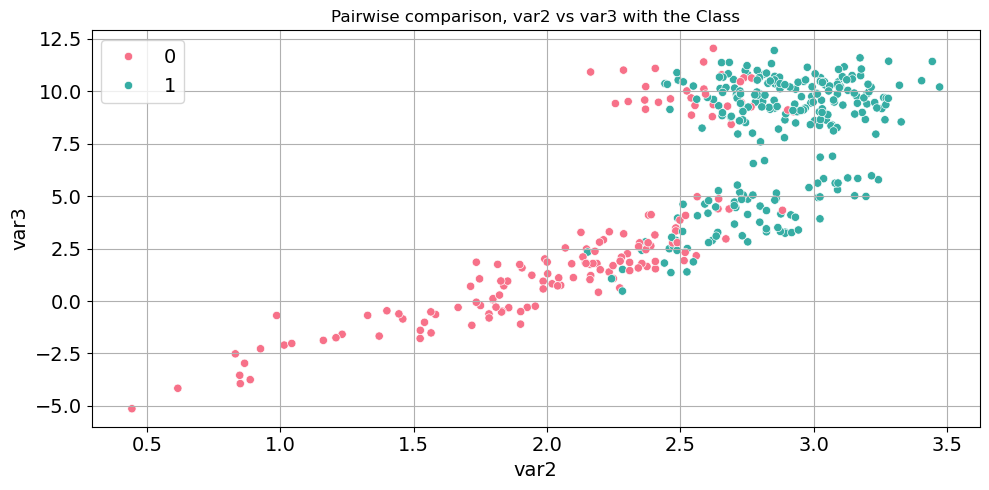

In [29]:
# Pairwise comparison using scatter plots, separated for better visualization
def Pairwise_comparison_Scatt(data):
    # Comparing var1 vs var2 with class
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=data, x="var1", y="var2", hue="class", palette="husl")
    plt.xlabel('var1',fontsize=14)
    plt.ylabel('var2',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.title('Pairwise comparison, var1 vs var2 with the Class',fontsize=14)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # comparing var1 vs var3 with class
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=data, x="var1", y="var3", hue="class", palette="husl")
    plt.xlabel('var1',fontsize=14)
    plt.ylabel('var3',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.title('Pairwise comparison, var1 vs var3 with the Class')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    # Comparing var2 vs var3 with class
    plt.figure(figsize=(10, 5))
    sns.scatterplot(data=data, x="var2", y="var3", hue="class", palette="husl")
    plt.xlabel('var2',fontsize=14)
    plt.ylabel('var3',fontsize=14)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)
    plt.title('Pairwise comparison, var2 vs var3 with the Class')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
Pairwise_comparison_Scatt(data)

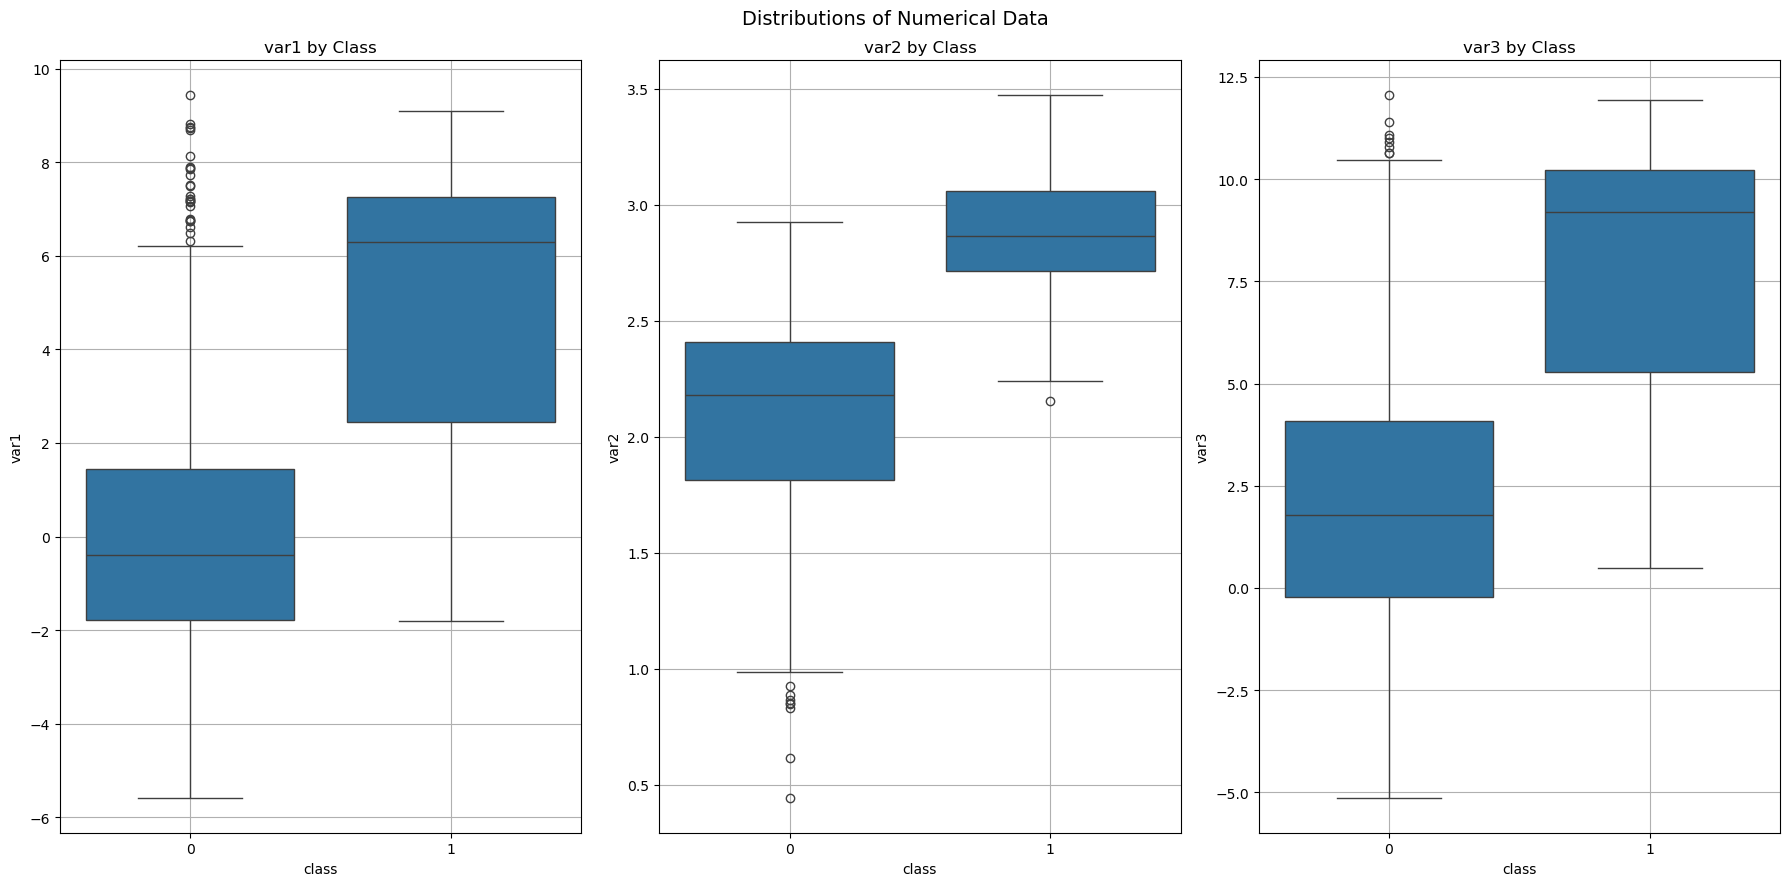

In [31]:
# Implementing Box plots for each variable by using class
def box_plot(data):
    plt.figure(figsize=(18, 9))
    plt.suptitle('Distributions of Numerical Data', fontsize=14)
    for i, col in enumerate(['var1', 'var2', 'var3'], 1):
        plt.subplot(1, 3, i)
        sns.boxplot(x="class", y=col, data=data)
        plt.title(f'{col} by Class')
        plt.grid(True)
    plt.tight_layout()
    plt.show()
box_plot(data)

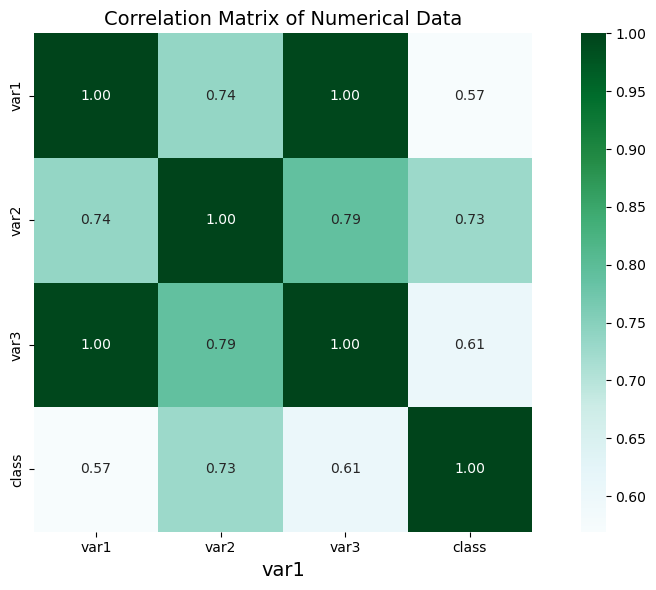

In [32]:
# Measuring correlation matrix to create a heatmap
correlation_matrix = data.corr()

# Ploting a heatmap using 
def heatmap_plot(data):
    plt.figure(figsize=(10, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='BuGn', fmt='.2f', square=True)
    plt.title('Correlation Matrix of Numerical Data', fontsize=14)
    plt.tight_layout()
    plt.show()
heatmap_plot(data)

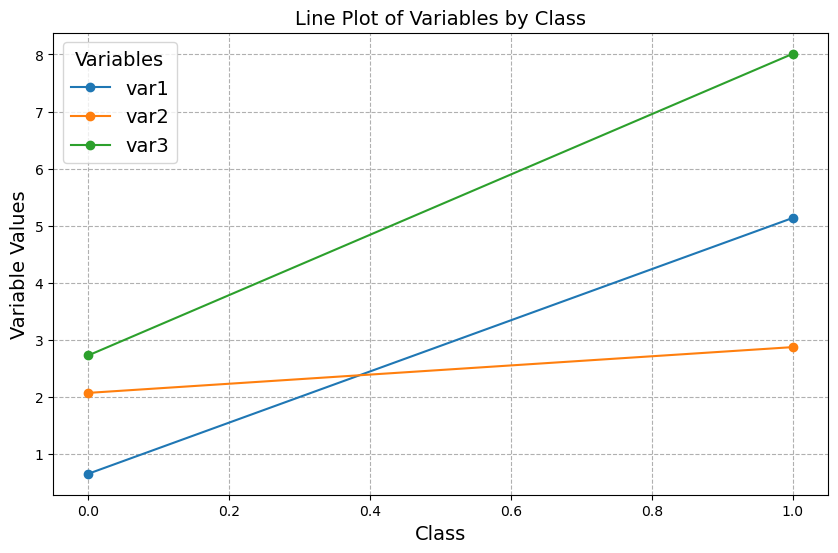

<Figure size 640x480 with 0 Axes>

In [51]:
# Creating a line plot for 'var1', 'var2', and 'var3' with 'class' on the x-axis
def Line_plot(data):
    plt.figure(figsize=(10, 6))
    for var in ['var1', 'var2', 'var3']:
        class_means = data.groupby('class')[var].mean()
        plt.plot(class_means.index, class_means.values, marker='o', label=var)
    
    # Customizing the plot
    plt.title('Line Plot of Variables by Class', fontsize=14)
    plt.xlabel('Class', fontsize=14)
    plt.ylabel('Variable Values', fontsize=14)
    plt.legend(title="Variables", fontsize=14, title_fontsize=14)
    plt.grid(linestyle='--')
    plt.show()
    plt.tight_layout()
Line_plot(data)